In [1]:
import os
import numpy as np
from typing import Any
from matplotlib import pyplot as plt

from utils.utils import load_obj_by_pickle, set_axes

In [2]:
# Load the training trace data
runtime_name: str = "bert-with-ddp"
train_trace_path: str = os.path.join("..", "outs", runtime_name, "train_traces", "train_trace.pkl")

data: Any = load_obj_by_pickle(train_trace_path)

In [3]:
# Display the type and keys of the loaded data
print(type(data))
print(data.keys(), end="\n\n")

for key, value in data.items():
    print(f"{key}: {type(value)}")
print("")

print(len(data["train_losses"]), type(data["train_losses"][0]))
print(len(data["valid_losses"]), type(data["valid_losses"][0]))
print(len(data["valid_bleu_scores"]), type(data["valid_bleu_scores"][0]))

<class 'dict'>
dict_keys(['train_losses', 'valid_losses', 'valid_bleu_scores'])

train_losses: <class 'list'>
valid_losses: <class 'list'>
valid_bleu_scores: <class 'list'>

100 <class 'float'>
100 <class 'float'>
100 <class 'float'>


In [4]:
# Prepare data for plotting
# Convert lists to numpy arrays for easier manipulation
epoch_idx: np.ndarray = np.arange(len(data["train_losses"]))
train_losses: np.ndarray = np.array(data["train_losses"])
valid_losses: np.ndarray = np.array(data["valid_losses"])
valid_bleu_scores: np.ndarray = np.array(data["valid_bleu_scores"])

# Get the maximum BLEU score and its index
max_bleu_idx: int = int(np.argmax(valid_bleu_scores))
max_bleu_score: float = valid_bleu_scores[max_bleu_idx]

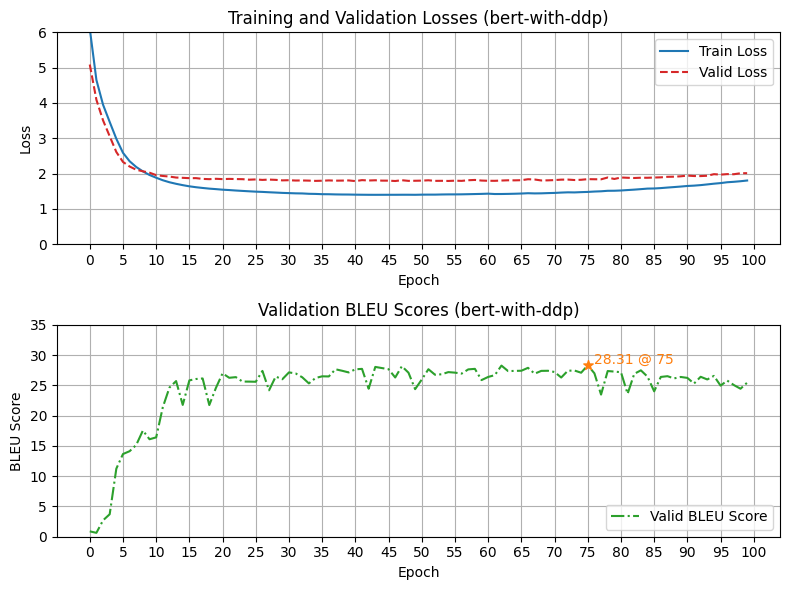

In [5]:
# Plotting the training and validation losses, and validation BLEU scores
# Create subplots
fix, axs = plt.subplots(2, 1, figsize=(8, 6))

# Subfigure 01: Training and Validation Losses
axs[0].plot(epoch_idx, train_losses, label="Train Loss", color="tab:blue", linestyle="-")
axs[0].plot(epoch_idx, valid_losses, label="Valid Loss", color="tab:red", linestyle="--")
set_axes(axs[0], title=f"Training and Validation Losses ({runtime_name})",
            xlabel="Epoch", xlim=None, xticks=np.linspace(0, len(epoch_idx), num=21),
            ylabel="Loss", ylim=[0, 6], yticks=np.linspace(0, 6, num=7),
            grid=True, legend_loc="upper right")

# Subfigure 02: Validation BLEU Scores
axs[1].plot(epoch_idx, valid_bleu_scores, label="Valid BLEU Score", color="tab:green", linestyle="-.")
# Significant point for maximum BLEU score
axs[1].scatter(max_bleu_idx, max_bleu_score, color="tab:orange", marker="*", s=50, zorder=5)
axs[1].annotate(f"{max_bleu_score:.2f} @ {max_bleu_idx}", xy=(max_bleu_idx, max_bleu_score),
                xytext=(max_bleu_idx + 1, max_bleu_score + 0.3), fontsize=10, color="tab:orange")
set_axes(axs[1], title=f"Validation BLEU Scores ({runtime_name})",
            xlabel="Epoch", xlim=None, xticks=np.linspace(0, len(epoch_idx), num=21),
            ylabel="BLEU Score", ylim=[0, 35], yticks=np.linspace(0, 35, num=8),
            grid=True, legend_loc="lower right")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()